## **PARTE 1 - LIMPEZA E TRATAMENTO DE DADOS**

#####IMPORTAR BIBLIOTECAS E CARREGAR DADOS





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('desafio4.xlsx')

In [3]:
df.head()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTOS,POSSUI CARTAO,ATIVO,SALARIO ANUAL,SAIU
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


#####1 - ALTERAÇÃO DAS COLUNAS PARA LETRAS MINÚSCULAS

In [13]:
df.columns = df.columns.str.lower()

In [12]:
df.head()

,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


#####2 - EXPLORE COLUNAS CATEGORICAS, UTILIZANDO FUNÇÃO ***groupby()*** E OUTRAS, VISANDO APLICAR OS GRÁFICOS PARA VISUALIZAÇÕES E A COMPREENSÃO DESSES DADOS

In [10]:
categorical_columns = ['estado', 'genero', 'possui cartao', 'ativo', 'saiu']

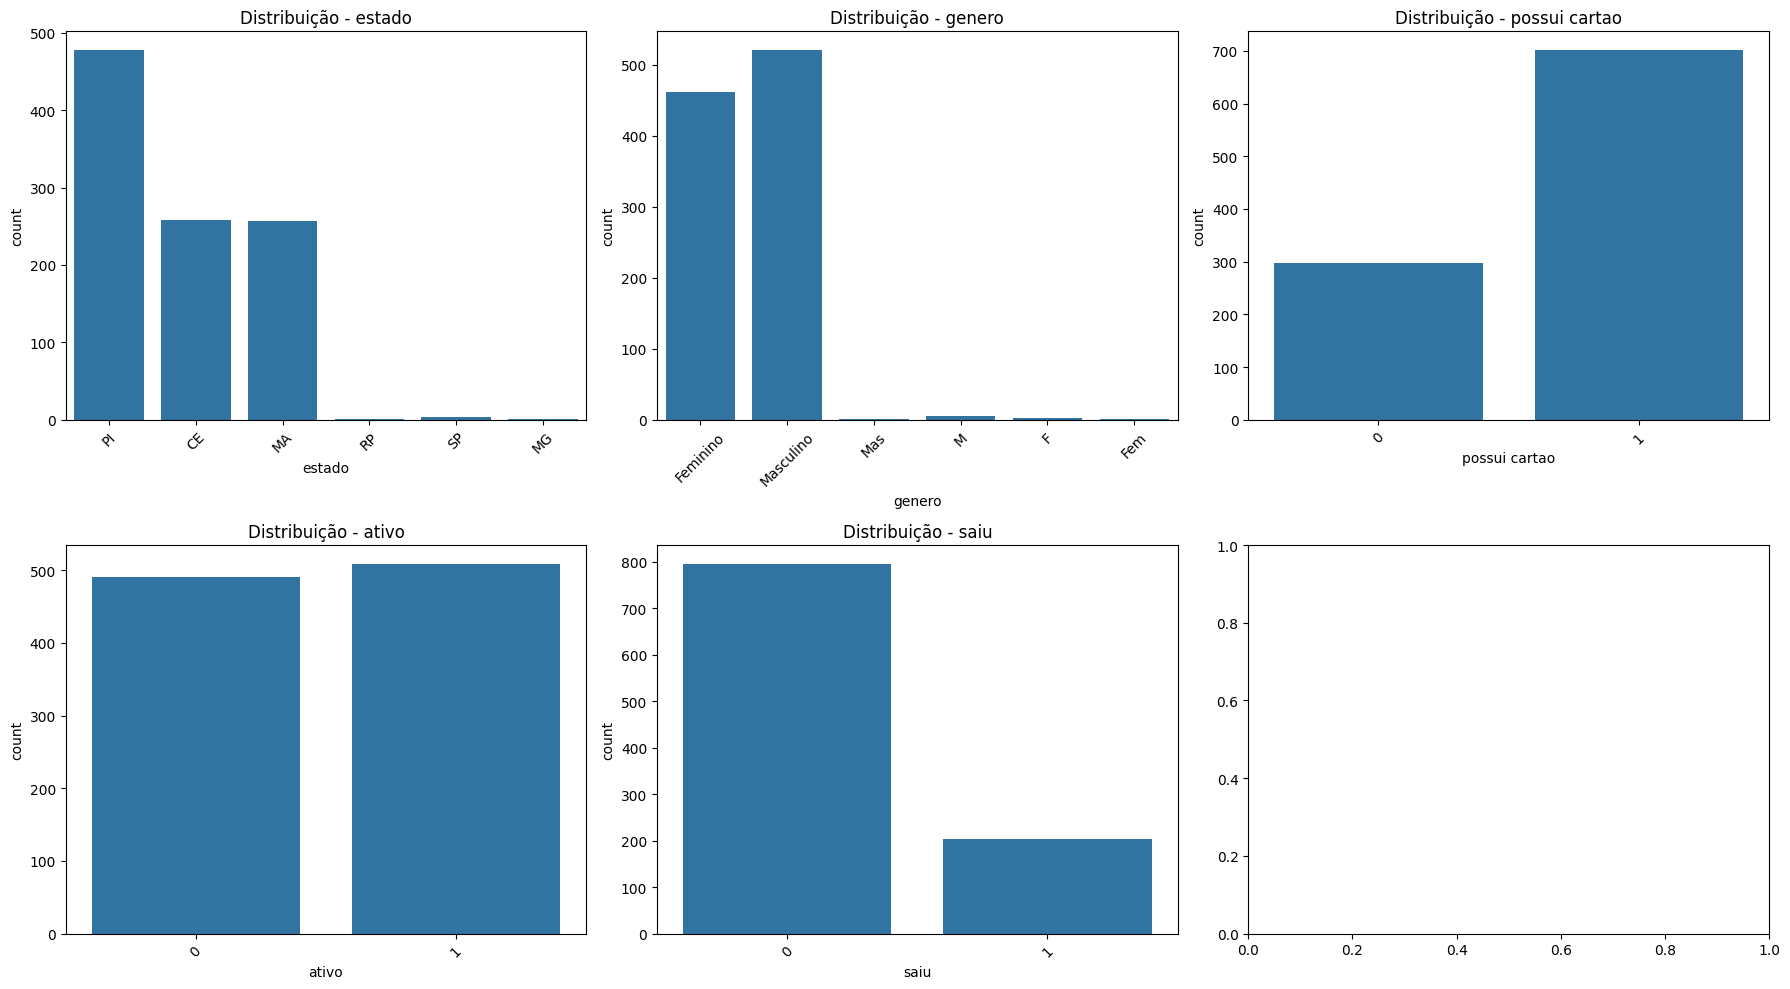

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribuição - {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
estado_churn = df.groupby(['estado', 'saiu']).size().unstack().fillna(0)
estado_churn_pct = estado_churn.div(estado_churn.sum(axis=1), axis=0) * 100
print(estado_churn_pct.round(2))

saiu         0       1
estado                
CE       80.23   19.77
MA       70.82   29.18
MG      100.00    0.00
PI       84.10   15.90
RP        0.00  100.00
SP      100.00    0.00


#####3 - EXPLORE COLUNAS NUMÉRICAS, UTILIZANDO A FUNÇÃO ***DESCRIBE()***, FAÇA UM BOXPLOT OU OUTRO GRÁFICO QUE ACHAR NECESSÁRIO, UTILIZANDO AS BIBLIOTECAS ***PANDAS*** E ***SEABORN***



In [ ]:
print(df.describe())

                id      pontos       idade        bens  saldo na conta  \
count   999.000000  999.000000  999.000000  999.000000    9.990000e+02   
mean    500.916917  648.621622   38.902903    5.069069    7.164928e+06   
std     288.662884   98.264219   11.401912    2.927691    6.311840e+06   
min       1.000000  376.000000  -20.000000    0.000000    0.000000e+00   
25%     251.500000  580.000000   32.000000    2.000000    0.000000e+00   
50%     501.000000  653.000000   37.000000    5.000000    8.958835e+06   
75%     750.500000  721.000000   44.000000    8.000000    1.258684e+07   
max    1000.000000  850.000000  140.000000   10.000000    2.117743e+07   

         produtos  possui cartao      ativo  salario anual        saiu  
count  999.000000     999.000000  999.00000   9.920000e+02  999.000000  
mean     1.526527       0.702703    0.50951   3.528762e+07    0.203203  
std      0.574201       0.457297    0.50016   5.305800e+08    0.402584  
min      1.000000       0.000000    0.000

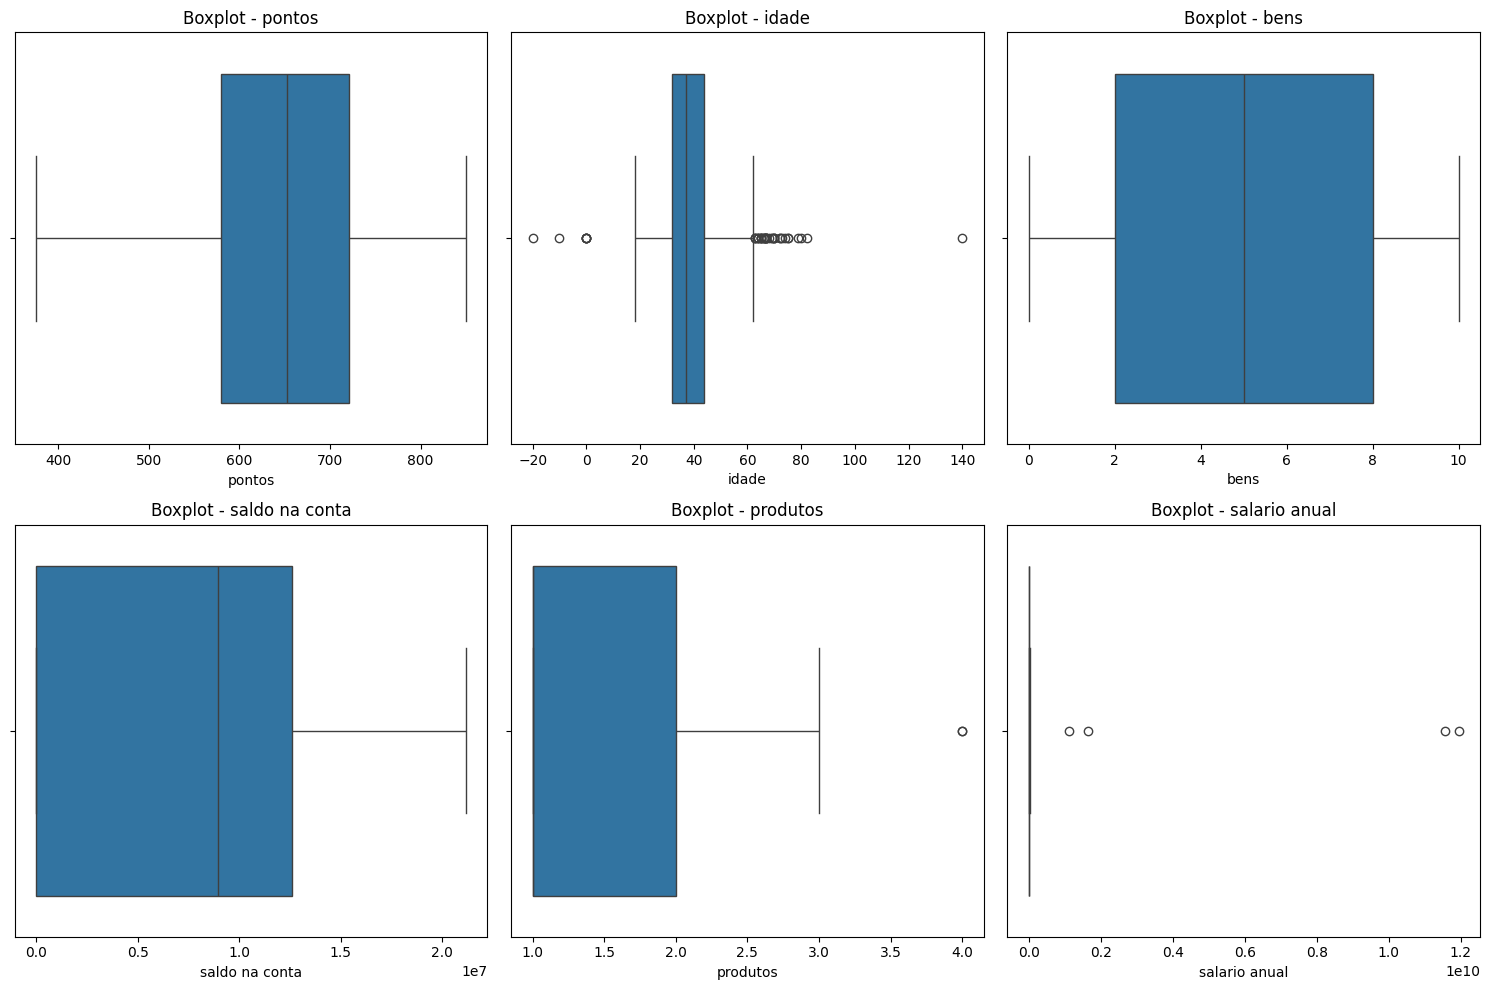

In [ ]:
num_cols = ['pontos', 'idade', 'bens', 'saldo na conta', 'produtos', 'salario anual']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

#####4 - Corrigir os dados faltantes  ***(NANs)*** e preencher as lacunas com valores adequados.

In [ ]:
print(df.isnull().sum())

id                0
pontos            0
estado            0
genero            8
idade             0
bens              0
saldo na conta    0
produtos          0
possui cartao     0
ativo             0
salario anual     7
saiu              0
dtype: int64


In [ ]:
df['salario anual'].fillna(df['salario anual'].median(), inplace=True)

<ipython-input-21-27c1c6ca8a19>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salario anual'].fillna(df['salario anual'].median(), inplace=True)


#####5 - Tratar os outliers, substituindo-os pelos valores adequados





In [ ]:
def tratar_outliers(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior,
                          np.where(df[coluna] > limite_superior, limite_superior, df[coluna]))

for col in num_cols:
    tratar_outliers(col)

#####6 - Eliminar os duplicados, para garantir a unicidade

In [ ]:
print("Duplicados antes:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicados depois:", df.duplicated().sum())

Duplicados antes: 1
Duplicados depois: 0


#####7 - Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino", "Fem" para "Feminino" e outras inconsistências se houver, para adequá-los ao padrão

In [ ]:
df['genero'] = df['genero'].str.strip().str.lower()
df['genero'] = df['genero'].replace({
    'mas': 'masculino',
    'fem': 'feminino',
    'm': 'masculino',
    'f': 'feminino'
})

print(df['genero'].value_counts())

genero
masculino    527
feminino     463
Name: count, dtype: int64


#####8 - Mostre o tamanho dos dados importados, utilizando o shape

In [ ]:
print("Tamanho do DataFrame (linhas, colunas):", df.shape)

Tamanho do DataFrame (linhas, colunas): (998, 12)


##**PARTE 2 - ESTATISTICA**


#####1 - Apresente a média e a mediana do saldo na conta dos clientes abaixo de 40 anos

In [ ]:
menor_40 = df[df['idade'] < 40]
media_menor_40 = menor_40['saldo na conta'].mean()
mediana_menor_40 = menor_40['saldo na conta'].median()

print("Clientes com menos de 40 anos:")
print("Média do saldo na conta:", round(media_menor_40, 2))
print("Mediana do saldo na conta:", round(mediana_menor_40, 2))

Clientes com menos de 40 anos:
Média do saldo na conta: 7015427.85
Mediana do saldo na conta: 8229382.0


#####2 - Apresente a média e a mediana do saldo na conta dos clientes acima de 40 anos

In [ ]:
maior_40 = df[df['idade'] > 40]
media_maior_40 = maior_40['saldo na conta'].mean()
mediana_maior_40 = maior_40['saldo na conta'].median()

print("\nClientes com mais de 40 anos:")
print("Média do saldo na conta:", round(media_maior_40, 2))
print("Mediana do saldo na conta:", round(mediana_maior_40, 2))


Clientes com mais de 40 anos:
Média do saldo na conta: 7430602.05
Mediana do saldo na conta: 9844419.0


#####3 - Apresente a média e a mediana do saldo na conta dos clientes que saíram e dos que permaneceram

In [ ]:
saiu = df[df['saiu'] == 1]

In [ ]:
ficou = df[df['saiu'] == 0]

In [ ]:
print("\nClientes que saíram:")
print("Média do saldo na conta:", round(saiu['saldo na conta'].mean(), 2))
print("Mediana do saldo na conta:", round(saiu['saldo na conta'].median(), 2))

print("\nClientes que permaneceram:")
print("Média do saldo na conta:", round(ficou['saldo na conta'].mean(), 2))
print("Mediana do saldo na conta:", round(ficou['saldo na conta'].median(), 2))


Clientes que saíram:
Média do saldo na conta: 8523988.16
Mediana do saldo na conta: 10843187.0

Clientes que permaneceram:
Média do saldo na conta: 6814752.81
Mediana do saldo na conta: 8061393.0


#####4 - Dos que saíram, mostre qual é o público predominante ***(Masculino ou Feminino)***, a idade, o saldo na conta, patrimônio e os seus respectivos estados

In [ ]:
genero_pred = saiu['genero'].value_counts().idxmax()

In [ ]:
idade_media = saiu['idade'].mean()

In [ ]:
saldo_medio = saiu['saldo na conta'].mean()

In [ ]:
bens_medio = saiu['bens'].mean()

In [ ]:
estado_pred = saiu['estado'].value_counts().idxmax()

In [ ]:
print("\nPerfil predominante entre os que saíram:")
print("Gênero:", genero_pred.capitalize())
print("Idade média:", round(idade_media, 1))
print("Saldo médio na conta:", round(saldo_medio, 2))
print("Patrimônio médio (bens):", round(bens_medio, 2))
print("Estado mais frequente:", estado_pred)


Perfil predominante entre os que saíram:
Gênero: Feminino
Idade média: 44.6
Saldo médio na conta: 8523988.16
Patrimônio médio (bens): 4.73
Estado mais frequente: PI


<ipython-input-44-3b01208f19cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_saldo_estado.index, y=media_saldo_estado.values, palette='viridis')


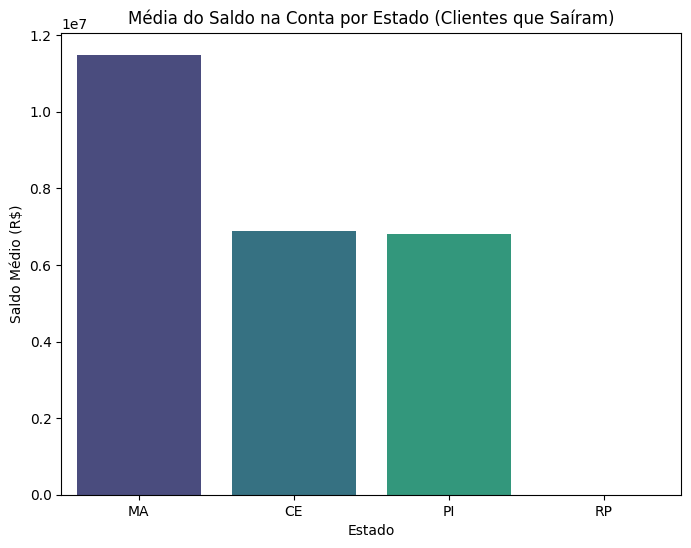

In [ ]:
media_saldo_estado = df[df['saiu'] == 1].groupby('estado')['saldo na conta'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=media_saldo_estado.index, y=media_saldo_estado.values, palette='viridis')
plt.title('Média do Saldo na Conta por Estado (Clientes que Saíram)')
plt.ylabel('Saldo Médio (R$)')
plt.xlabel('Estado')
plt.show()